# Neural Network 실습 전 개념 잡기  
- scikit-learn으로 선형회귀 및 선형분류 모델 구축하기

In [1]:
# 필요 패키지 및 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## Linear Regression   
- Goal : 데이터가 주어질 때 데이터를 가장 잘 표현할 수 있는 선형 방정식을 찾아내는 것

In [2]:
# 선형 데이터 생성
# np.random.randn : 평균 0, 편차 1인 정규 분포표 난수 생성
# np.random.rand : 0~1 사이의 균일 분포 난수 생성

# train 데이터
X_train = 2*np.random.rand(100,1)
y_train = 4 + 3*X_train + np.random.randn(100,1)

# test 데이터
X_test = 2*np.random.rand(20,1)
y_test = 4 + 4*X_test + np.random.randn(20,1)

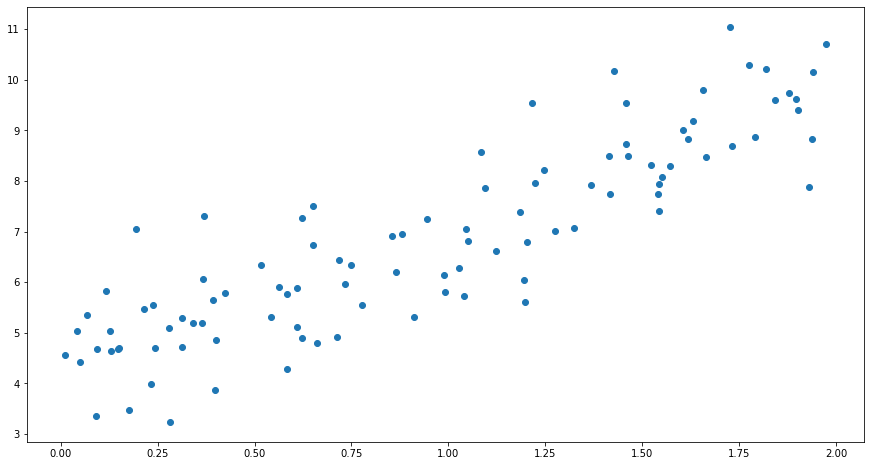

In [3]:
# train 데이터 scatter 시각화
plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train)
plt.show()

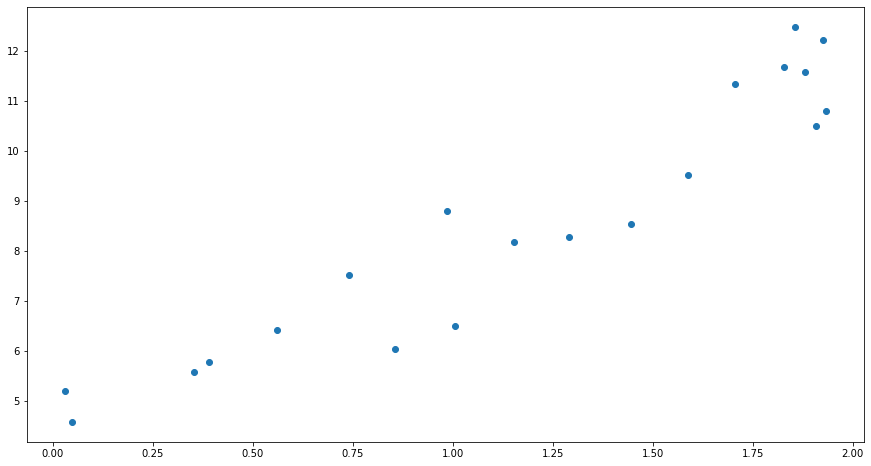

In [4]:
# test 데이터 scatter 시각화
plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test)
plt.show()

In [5]:
# 모델 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# weight(기울기) 및 bias(y 절편) 구하기 
weight, bias = model.intercept_, model.coef_[0]
print('기울기: ', weight)
print('y 절편: ', bias)

기울기:  [4.21509616]
y 절편:  [2.77011339]


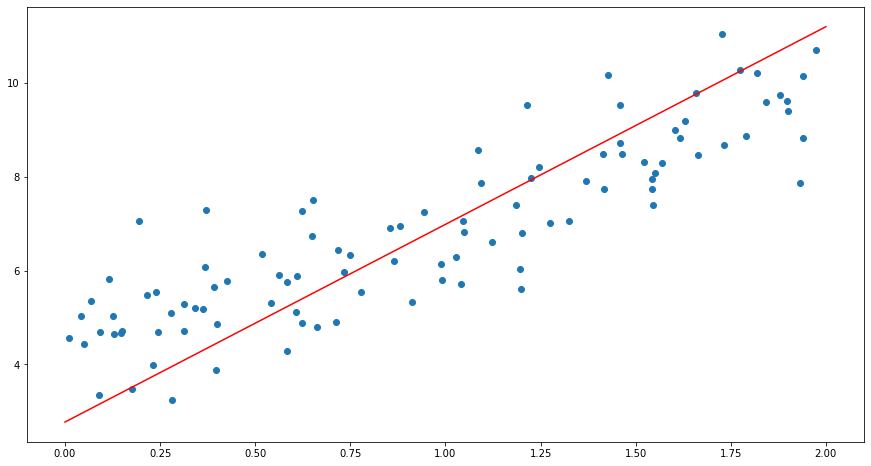

In [7]:
# 모델이 생성한 선형 회귀 방정식이 train data에 대해 잘 나타내었는지 확인
sample = np.linspace(0,2)

plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train)
plt.plot(sample, weight*sample+bias, color='red')
plt.show()

- 따라서 모델이 생성한 선형 회귀 방정식은 다음과 같이 나타낼 수 있음
$$Linear\, Regression\, Equation : y = wx + b$$

In [8]:
# test 데이터에 대해 predict 진행
output = model.predict(X_test)

### loss function은 MAE로 진행
$$loss\, function\, : mean\, absolute\, error\, = \frac{1}{n}\sum_{i=1}^n|y_{pred}-y_{label}|$$

In [9]:
# loss function 만들기 (mean absolute error)
def mae(output, target):
    loss = np.abs(output-target)
    loss = loss.sum()
    loss = loss/len(output)
    return loss

# 아니면 다음과 같이 정의할 수 있음
mae = lambda output, target: np.abs(output-target).sum()/len(output)

# loss 구하기
print('mae : ', mae(output, y_test))

mae :  1.2093958314094289


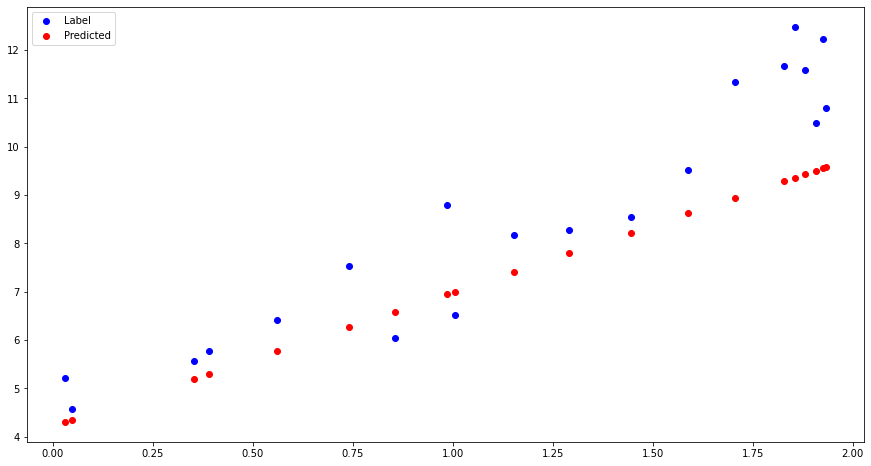

In [10]:
# predicted와 label 비교
plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test, label='Label', color='blue')
plt.scatter(X_test, output, label='Predicted', color='red')
plt.legend(loc='best')
plt.show()

## Linear Classification  
- Goal : 여러 클래스의 데이터가 주어지면 이 클래스들을 구별할 수 있는 분류 경계를 그리는 것

In [11]:
# 데이터 생성
X_train = np.array([[0.2,0.4], [0.4,0.2], [0.65,0.3],  # class 1
                    [0.8,0.5], [0.5,0.8], [0.25,0.8]]) # class 2
y_train = np.array([[0], [0], [0],   # class 1
                    [1], [1], [1]])  # class 2

print(X_train)
print(y_train)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


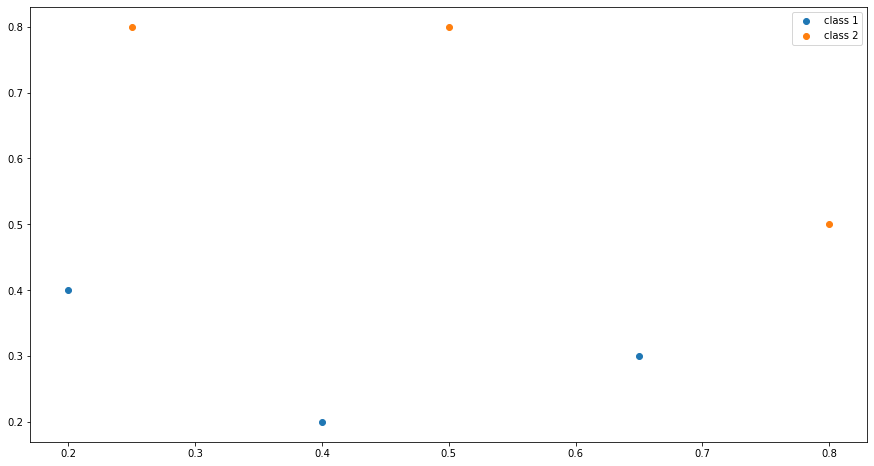

In [12]:
# 데이터 분포 시각화
plt.figure(figsize=(15,8))
plt.scatter(X_train[:3,0], X_train[:3,1], label='class 1')
plt.scatter(X_train[3:,0], X_train[3:,1], label='class 2')
plt.legend(loc='best')
plt.show()

In [13]:
# 모델 학습
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=10)
model.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\tf2\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10)

In [14]:
# train data에 대해 모델의 정확도 체크
train_acc = model.score(X_train, y_train)
print('accuracy of training :', train_acc*100, '%')

accuracy of training : 100.0 %


In [15]:
# weight 및 bias 구하기
weight1, weight2 = model.coef_[0]
bias = model.intercept_
print('first weight :', weight1)
print('second weight :', weight2)
print('bias :', bias)

first weight : 17.94145420207743
second weight : 20.774315391879117
bias : [-19.46186535]


### weight들과 bias를 가지고 decision boundary 그리기   
- $n$차원 공간에 있는 데이터 사이의 decision boundary는 $n-1$ 차원임  
- 즉, 2차원 공간에 있는 데이터 사이의 decision boundary는 1차원 즉, line 임  
- 이 예제에서 사용한 데이터는 2차원임    
- 따라서 이에 맞춰 식을 변경할 필요가 있음  
- 위의 데이터 정의에 의해 $x$축은 $w_1$에 해당, $y$축은 $w_2$에 해당  
$$decision\, boundary\, :\, w_1x_1+w_2x_2+b=0$$  
- $x_2$에 대한 식으로 표현하면   
$$\Rightarrow x_2=-\frac{w1}{w2}x-\frac{b}{w2}$$

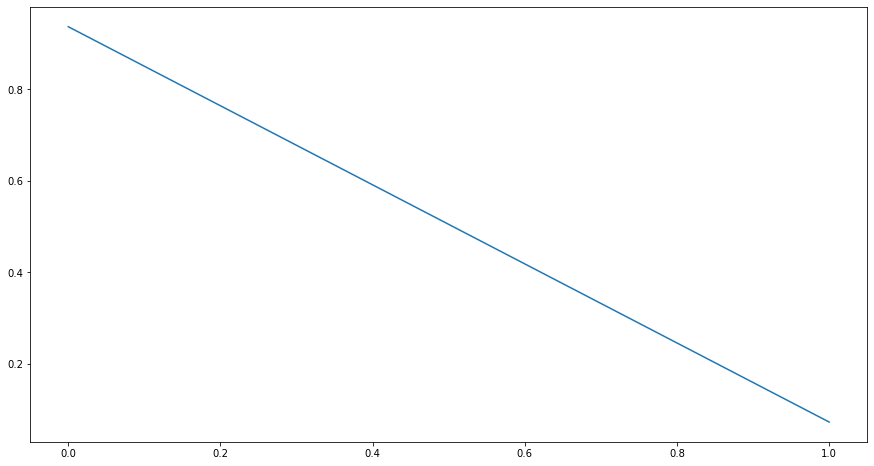

In [16]:
# 결정 경계선
x = np.linspace(0,1,100)
y = (-weight1/weight2) * x - (bias/weight2)

plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.show()

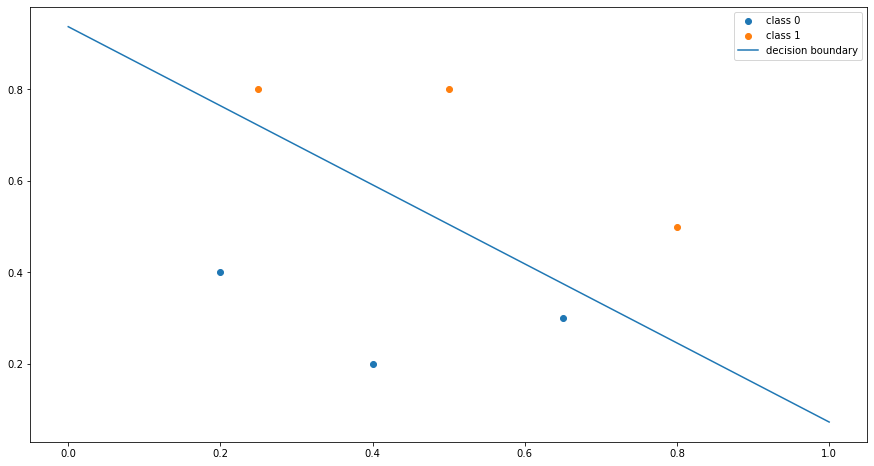

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(X_train[:3,0], X_train[:3,1], label='class 0')
plt.scatter(X_train[3:,0], X_train[3:,1], label='class 1')
plt.plot(x, y, label='decision boundary')
plt.legend(loc='best')
plt.show()

# Homework  
- 실습한 내용들 가지고 복습  
- 데이터를 더 많이 늘려서 regression, classification 모델 학습 시켜보기  
- linear regression model의 loss function을 RMSE로 변경해서 실습  
- 텐서플로, Neural Network에 대해서 간단하게 살펴보기